# Deep Q-Learning 

For this assignment we will implement the Deep Q-Learning algorithm with Experience Replay as described in breakthrough paper __"Playing Atari with Deep Reinforcement Learning"__. We will train an agent to play the famous game of __Breakout__.

In [8]:
import sys
import gym
import torch

import pylab
import random
import numpy as np
from collections import deque
from datetime import datetime
from copy import deepcopy
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from utils import *
from agent import *
from model import *
from config import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Understanding the environment

In the following cell, we initialise our game of __Breakout__ and you can see how the environment looks like. For further documentation of the of the environment refer to https://gym.openai.com/envs. 

In [9]:
env = gym.make('Pong-v0')
#env.render()

In [10]:
number_lives = find_max_lifes(env)
state_size = env.observation_space.shape
action_size = 3
rewards, episodes = [], []

## Creating a DQN Agent

Here we create a DQN Agent. This agent is defined in the __agent.py__. The corresponding neural network is defined in the __model.py__. 

__Evaluation Reward__ : The average reward received in the past 100 episodes/games.

__Frame__ : Number of frames processed in total.

__Memory Size__ : The current size of the replay memory.

In [11]:
agent = Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

### Main Training Loop

episode: 0   score: -21.0   memory length: 1140   epsilon: 1.0    steps: 1140     evaluation reward: -21.0
episode: 1   score: -21.0   memory length: 2349   epsilon: 1.0    steps: 1209     evaluation reward: -21.0
episode: 2   score: -21.0   memory length: 3533   epsilon: 1.0    steps: 1184     evaluation reward: -21.0
episode: 3   score: -21.0   memory length: 4548   epsilon: 1.0    steps: 1015     evaluation reward: -21.0
episode: 4   score: -20.0   memory length: 5758   epsilon: 1.0    steps: 1210     evaluation reward: -20.8
episode: 5   score: -21.0   memory length: 6857   epsilon: 1.0    steps: 1099     evaluation reward: -20.833333333333332
episode: 6   score: -20.0   memory length: 8377   epsilon: 1.0    steps: 1520     evaluation reward: -20.714285714285715
episode: 7   score: -20.0   memory length: 9666   epsilon: 1.0    steps: 1289     evaluation reward: -20.625
episode: 8   score: -21.0   memory length: 10848   epsilon: 0.991594899999994    steps: 1182     evaluation reward

episode: 62   score: -14.0   memory length: 149555   epsilon: 0.009999999999411882    steps: 3896     evaluation reward: -17.96825396825397
now time :  2018-12-19 17:29:35.348364
episode: 63   score: -14.0   memory length: 154022   epsilon: 0.009999999999411882    steps: 4467     evaluation reward: -17.90625
episode: 64   score: -10.0   memory length: 158914   epsilon: 0.009999999999411882    steps: 4892     evaluation reward: -17.784615384615385
episode: 65   score: -13.0   memory length: 163602   epsilon: 0.009999999999411882    steps: 4688     evaluation reward: -17.71212121212121
episode: 66   score: -8.0   memory length: 168852   epsilon: 0.009999999999411882    steps: 5250     evaluation reward: -17.567164179104477
episode: 67   score: -14.0   memory length: 173838   epsilon: 0.009999999999411882    steps: 4986     evaluation reward: -17.514705882352942
episode: 68   score: -17.0   memory length: 178110   epsilon: 0.009999999999411882    steps: 4272     evaluation reward: -17.507

episode: 121   score: -18.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 3429     evaluation reward: -15.33
episode: 122   score: -13.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 3985     evaluation reward: -15.27
episode: 123   score: -16.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 3346     evaluation reward: -15.22
episode: 124   score: -12.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 5106     evaluation reward: -15.13
episode: 125   score: -11.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 5066     evaluation reward: -15.06
episode: 126   score: -13.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 4062     evaluation reward: -14.99
episode: 127   score: -12.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 5331     evaluation reward: -14.92
episode: 128   score: -11.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 420

episode: 184   score: -16.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 5427     evaluation reward: -14.62
episode: 185   score: -18.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 3964     evaluation reward: -14.66
episode: 186   score: -15.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 3563     evaluation reward: -14.66
episode: 188   score: -15.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 5231     evaluation reward: -14.67
episode: 189   score: -18.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 4123     evaluation reward: -14.75
episode: 190   score: -18.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 4048     evaluation reward: -14.77
now time :  2018-12-19 20:18:52.400744
episode: 191   score: -13.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 4882     evaluation reward: -14.78
episode: 192   score: -16.0   memory length: 200000   epsi

now time :  2018-12-19 21:36:43.303656
episode: 249   score: -13.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 3866     evaluation reward: -15.03
episode: 250   score: -15.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 4763     evaluation reward: -14.98
episode: 251   score: -19.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 4474     evaluation reward: -15.01
episode: 252   score: -15.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 4002     evaluation reward: -14.99
episode: 253   score: -14.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 4462     evaluation reward: -15.01
episode: 254   score: -13.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 5263     evaluation reward: -14.98
episode: 255   score: -18.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 3886     evaluation reward: -15.03
episode: 256   score: -15.0   memory length: 200000   epsi

episode: 311   score: -16.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 4510     evaluation reward: -14.78
episode: 312   score: -17.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 3225     evaluation reward: -14.79
episode: 313   score: -15.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 3495     evaluation reward: -14.78
episode: 314   score: -12.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 4982     evaluation reward: -14.74
episode: 315   score: -18.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 4647     evaluation reward: -14.76
episode: 316   score: -20.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 4023     evaluation reward: -14.79
episode: 317   score: -19.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 3191     evaluation reward: -14.8
episode: 318   score: -13.0   memory length: 200000   epsilon: 0.009999999999411882    steps: 4435

KeyboardInterrupt: 

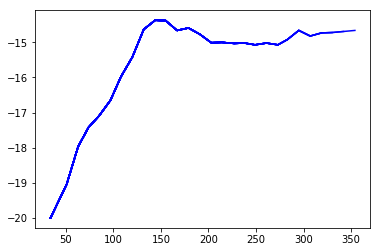

In [12]:
for e in range(EPISODES):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    d = False
    state = env.reset()
    life = number_lives

    get_init_state(history, state)

    while not done:
        step += 1
        frame += 1
        #if render_breakout:
        #    env.render()

        # Select and perform an action
        action = agent.get_action(np.float32(history[:4, :, :]) / 255.)

        
        next_state, reward, done, info = env.step(action + 1)

        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state
        terminal_state = check_live(life, info['ale.lives'])

        life = info['ale.lives']
        r = np.clip(reward, -1, 1)

        # Store the transition in memory 
        agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
        # Start training after random sample generation
        if(frame >= train_frame):
            agent.train_policy_net(frame)
            # Update the target network
            if(frame % Update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:4, :, :] = history[1:, :, :]

        if frame % 50000 == 0:
            print('now time : ', datetime.now())
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.savefig("./save_graph/ec1_breakout_dqn.png")

        if done:
            evaluation_reward.append(score)
            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "    evaluation reward:", np.mean(evaluation_reward))

            # if the mean of scores of last 10 episode is bigger than 400
            # stop training
            if np.mean(evaluation_reward) > 10000:
                torch.save(agent.policy_net, "./save_model/ec1_breakout_dqn2")
                sys.exit()

In [13]:
torch.save(agent.policy_net, "./save_model/ec1_breakout_dqn2")